In [548]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math 
from __future__ import division # this allows for floating point division
from scipy import integrate

# 2a)
Use the finite difference method to solve the same problem using a finite eigensystem. 

In [549]:
#Number of internal points
N=50

#Spatial step size
h=1/(N+1)

x_array=np.arange(h,(N+1)*h, h) #0....1 in steps of 1/N, 1D array, represents position 
print x_array
print len(x_array)

A=[]
A=np.append(A,[-1,1])
A=np.append(A,np.zeros(N-2))

for i in np.arange(2,N): # for 2, 3....N-1: # i is the row number
    A=np.append(A,np.zeros(i-2))
    A=np.append(A,[1,-2,1])
    A=np.append(A,np.zeros(N-(i-2)-3))
A=np.append(A,np.zeros(N-2))
A=np.append(A,[1,-1])
A=np.reshape(A,(N,N))
print A
            

[ 0.01960784  0.03921569  0.05882353  0.07843137  0.09803922  0.11764706
  0.1372549   0.15686275  0.17647059  0.19607843  0.21568627  0.23529412
  0.25490196  0.2745098   0.29411765  0.31372549  0.33333333  0.35294118
  0.37254902  0.39215686  0.41176471  0.43137255  0.45098039  0.47058824
  0.49019608  0.50980392  0.52941176  0.54901961  0.56862745  0.58823529
  0.60784314  0.62745098  0.64705882  0.66666667  0.68627451  0.70588235
  0.7254902   0.74509804  0.76470588  0.78431373  0.80392157  0.82352941
  0.84313725  0.8627451   0.88235294  0.90196078  0.92156863  0.94117647
  0.96078431  0.98039216]
50
[[-1.  1.  0. ...,  0.  0.  0.]
 [ 1. -2.  1. ...,  0.  0.  0.]
 [ 0.  1. -2. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ..., -2.  1.  0.]
 [ 0.  0.  0. ...,  1. -2.  1.]
 [ 0.  0.  0. ...,  0.  1. -1.]]


In [550]:
eigvalues, eigvectors= np.linalg.eig(A)
print eigvalues
print eigvectors

[ -3.99605346e+00  -3.98422940e+00  -3.96457450e+00  -3.93716632e+00
  -3.90211303e+00  -3.85955297e+00  -3.80965410e+00  -3.75261336e+00
  -3.68865585e+00  -3.61803399e+00  -3.54102649e+00  -3.45793725e+00
  -3.36909421e+00  -3.27484798e+00  -3.17557050e+00  -3.07165359e+00
  -2.96350735e+00  -2.85155858e+00  -2.73624911e+00  -2.61803399e+00
  -2.49737977e+00  -2.37476263e+00  -2.25066647e+00  -2.12558104e+00
  -2.00000000e+00  -1.87441896e+00  -1.74933353e+00  -1.62523737e+00
  -1.50262023e+00  -1.38196601e+00  -1.26375089e+00  -1.14844142e+00
  -1.03649265e+00  -9.28346410e-01  -8.24429495e-01  -7.25152021e-01
  -6.30905788e-01  -5.42062745e-01  -4.58973514e-01  -1.05679410e-16
  -3.94654314e-03  -1.57705974e-02  -3.54254985e-02  -6.28336777e-02
  -9.78869674e-02  -1.40447028e-01  -1.90345895e-01  -2.47386640e-01
  -3.11344149e-01  -3.81966011e-01]
[[ -6.28215182e-03  -1.25581039e-02  -1.88216627e-02 ...,   1.93716632e-01
   -1.92058737e-01   1.90211303e-01]
 [  1.88216627e-02   3.7

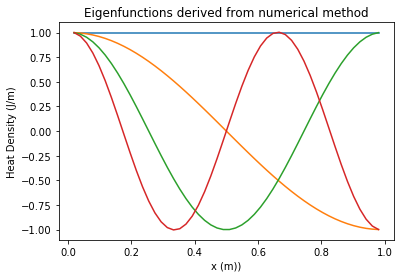

In [554]:
idx = eigvalues.argsort()[::-1] # Sorts from lowest to highest.
eigvalues = eigvalues[idx]
eigvectors = eigvectors[:,idx]

for i in np.arange(4):
    plt.plot(x_array, eigvectors[:,i])
    plt.title("Eigenfunctions derived from numerical method")
    plt.xlabel("x (m))")
    plt.ylabel("Heat Density (J/m)")

# 2b) 
Compare the eigenfunctions to your analytic method and test how its accuracy varies with N. 

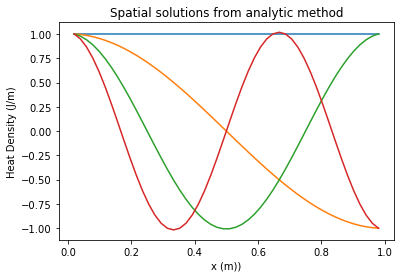

In [556]:
for n in np.arange(4):
    plt.plot(x_array, np.cos(n*np.pi*x_array)/np.cos(n*np.pi*x_array[0])) # This is not normalized. 
    plt.title("Spatial solutions from analytic method")
    plt.xlabel("x (m))")
    plt.ylabel("Heat Density (J/m)")

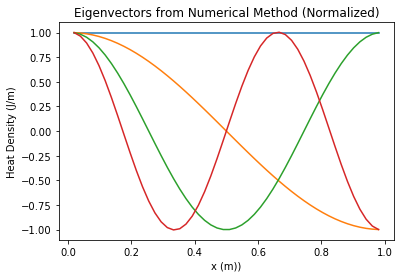

In [557]:
# Create new matrix, divide all entries each eigenvector by the first entry of that eigenvector
# Normalization! 

for i in np.arange(N):
    eigvectors[:,i]= eigvectors[:,i]/eigvectors[0,i]
    
idx = eigvalues.argsort()[::-1] # Sorts from lowest to highest.
eigvalues = eigvalues[idx]
eigvectors = eigvectors[:,idx]

for i in np.arange(4):
    plt.plot(x_array, eigvectors[:,i])
    plt.title("Eigenvectors from Numerical Method (Normalized)")
    plt.xlabel("x (m))")
    plt.ylabel("Heat Density (J/m)")

From the graphs, the finite difference method and the analytic method give the same results! 

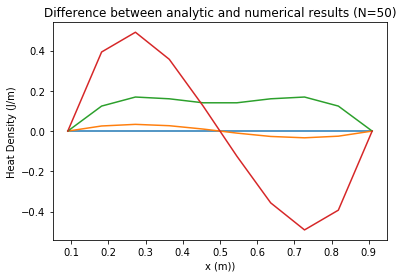

In [560]:
for i in np.arange(4):
    plt.plot(x_array, eigvectors[:,i]-np.cos(i*np.pi*x_array)/np.cos(i*np.pi*x_array[0]))
    plt.title("Difference between analytic and numerical results (N=50)")
    plt.xlabel("x (m))")
    plt.ylabel("Heat Density (J/m)")

[ 0.09090909  0.18181818  0.27272727  0.36363636  0.45454545  0.54545455
  0.63636364  0.72727273  0.81818182  0.90909091]
10
[ -3.90211303e+00  -3.61803399e+00  -3.17557050e+00  -2.61803399e+00
  -2.00000000e+00  -1.38196601e+00  -8.24429495e-01   9.97909443e-17
  -9.78869674e-02  -3.81966011e-01]
[[  6.99596196e-02   1.38196601e-01  -2.03030724e-01   2.62865556e-01
   -3.16227766e-01   3.61803399e-01  -3.98470231e-01  -3.16227766e-01
    4.41707654e-01   4.25325404e-01]
 [ -2.03030724e-01  -3.61803399e-01   4.41707654e-01  -4.25325404e-01
    3.16227766e-01  -1.38196601e-01  -6.99596196e-02  -3.16227766e-01
    3.98470231e-01   2.62865556e-01]
 [  3.16227766e-01   4.47213595e-01  -3.16227766e-01   1.44484186e-15
    3.16227766e-01  -4.47213595e-01   3.16227766e-01  -3.16227766e-01
    3.16227766e-01   6.75430813e-17]
 [ -3.98470231e-01  -3.61803399e-01  -6.99596196e-02   4.25325404e-01
   -3.16227766e-01  -1.38196601e-01   4.41707654e-01  -3.16227766e-01
    2.03030724e-01  -2.628655

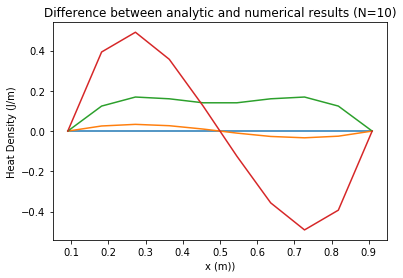

In [561]:
N=10

#Spatial step size
h=1/(N+1)

x_array=np.arange(h,(N+1)*h, h) #0....1 in steps of 1/N, 1D array, represents position 
print x_array
print len(x_array)

A=[]
A=np.append(A,[-1,1])
A=np.append(A,np.zeros(N-2))

for i in np.arange(2,N): # for 2, 3....N-1: # i is the row number
    A=np.append(A,np.zeros(i-2))
    A=np.append(A,[1,-2,1])
    A=np.append(A,np.zeros(N-(i-2)-3))
A=np.append(A,np.zeros(N-2))
A=np.append(A,[1,-1])
A=np.reshape(A,(N,N))

eigvalues, eigvectors= np.linalg.eig(A)
print eigvalues
print eigvectors

idx = eigvalues.argsort()[::-1] # Sorts from lowest to highest.
eigvalues = eigvalues[idx]
eigvectors = eigvectors[:,idx]
    
# Normalization

for i in np.arange(N):
    eigvectors[:,i]= eigvectors[:,i]/eigvectors[0,i]
    
idx = eigvalues.argsort()[::-1] # Sorts from lowest to highest.
eigvalues = eigvalues[idx]
eigvectors = eigvectors[:,idx]

for i in np.arange(4):
    plt.plot(x_array, eigvectors[:,i]-np.cos(i*np.pi*x_array)/np.cos(i*np.pi*x_array[0]))
    plt.title("Difference between analytic and numerical results (N=10)")
    plt.xlabel("x (m))")
    plt.ylabel("Heat Density (J/m)")

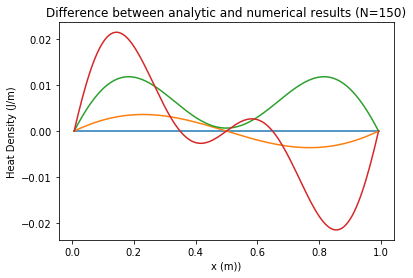

In [562]:
N=150

#Spatial step size
h=1/(N+1)

x_array=np.arange(h,(N+1)*h, h) #0....1 in steps of 1/N, 1D array, represents position 
# print x_array
# print len(x_array)

A=[]
A=np.append(A,[-1,1])
A=np.append(A,np.zeros(N-2))

for i in np.arange(2,N): # for 2, 3....N-1: # i is the row number
    A=np.append(A,np.zeros(i-2))
    A=np.append(A,[1,-2,1])
    A=np.append(A,np.zeros(N-(i-2)-3))
A=np.append(A,np.zeros(N-2))
A=np.append(A,[1,-1])
A=np.reshape(A,(N,N))

eigvalues, eigvectors= np.linalg.eig(A)
# print eigvalues
# print eigvectors

idx = eigvalues.argsort()[::-1] # Sorts from lowest to highest.
eigvalues = eigvalues[idx]
eigvectors = eigvectors[:,idx]
    
# Normalization

for i in np.arange(N):
    eigvectors[:,i]= eigvectors[:,i]/eigvectors[0,i]
    
idx = eigvalues.argsort()[::-1] # Sorts from lowest to highest.
eigvalues = eigvalues[idx]
eigvectors = eigvectors[:,idx]

for i in np.arange(4):
    plt.plot(x_array, eigvectors[:,i]-np.cos(i*np.pi*x_array)/np.cos(i*np.pi*x_array[0]))
    plt.title("Difference between analytic and numerical results (N=150)")
    plt.xlabel("x (m))")
    plt.ylabel("Heat Density (J/m)")

[ 0.00199601  0.00399202  0.00598802  0.00798403  0.00998004  0.01197605
  0.01397206  0.01596806  0.01796407  0.01996008  0.02195609  0.0239521
  0.0259481   0.02794411  0.02994012  0.03193613  0.03393214  0.03592814
  0.03792415  0.03992016  0.04191617  0.04391218  0.04590818  0.04790419
  0.0499002   0.05189621  0.05389222  0.05588822  0.05788423  0.05988024
  0.06187625  0.06387226  0.06586826  0.06786427  0.06986028  0.07185629
  0.0738523   0.0758483   0.07784431  0.07984032  0.08183633  0.08383234
  0.08582834  0.08782435  0.08982036  0.09181637  0.09381238  0.09580838
  0.09780439  0.0998004   0.10179641  0.10379242  0.10578842  0.10778443
  0.10978044  0.11177645  0.11377246  0.11576846  0.11776447  0.11976048
  0.12175649  0.1237525   0.1257485   0.12774451  0.12974052  0.13173653
  0.13373253  0.13572854  0.13772455  0.13972056  0.14171657  0.14371257
  0.14570858  0.14770459  0.1497006   0.15169661  0.15369261  0.15568862
  0.15768463  0.15968064  0.16167665  0.16367265  0.

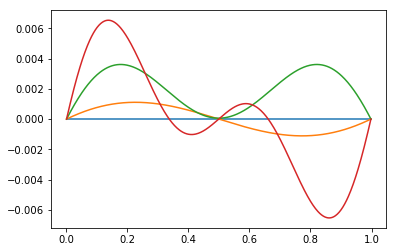

In [563]:
N=500

#Spatial step size
h=1/(N+1)

x_array=np.arange(h,(N+1)*h, h) #0....1 in steps of 1/N, 1D array, represents position 
print x_array
print len(x_array)

A=[]
A=np.append(A,[-1,1])
A=np.append(A,np.zeros(N-2))

for i in np.arange(2,N): # for 2, 3....N-1: # i is the row number
    A=np.append(A,np.zeros(i-2))
    A=np.append(A,[1,-2,1])
    A=np.append(A,np.zeros(N-(i-2)-3))
A=np.append(A,np.zeros(N-2))
A=np.append(A,[1,-1])
A=np.reshape(A,(N,N))

eigvalues, eigvectors= np.linalg.eig(A)
print eigvalues
print eigvectors

idx = eigvalues.argsort()[::-1] # Sorts from lowest to highest.
eigvalues = eigvalues[idx]
eigvectors = eigvectors[:,idx]
    
# Normalization

for i in np.arange(N):
    eigvectors[:,i]= eigvectors[:,i]/eigvectors[0,i]
    
idx = eigvalues.argsort()[::-1] # Sorts from lowest to highest.
eigvalues = eigvalues[idx]
eigvectors = eigvectors[:,idx]

for i in np.arange(4):
    plt.plot(x_array, eigvectors[:,i]-np.cos(i*np.pi*x_array)/np.cos(i*np.pi*x_array[0]))


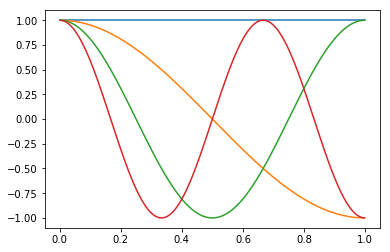

In [564]:
# This is just scratchwork. 

for i in np.arange(4):
    plt.plot(x_array, eigvectors[:,i])

I plotted the errors for N=50,10,150,500, and the errors got smaller as N increased, as expected. As n increases the error increases! 

# 2c)
Demonstrate how a central temperature excess (use a Gaussian with a standard deviation of about one pixel) evolves over time. 

In [ ]:
N=500

#Spatial step size
h=1/(N+1)

x_array=np.arange(h,(N+1)*h, h) #0....1 in steps of 1/N, 1D array, represents position 
print x_array
print len(x_array)

A=[]
A=np.append(A,[-1,1])
A=np.append(A,np.zeros(N-2))

for i in np.arange(2,N): # for 2, 3....N-1: # i is the row number
    A=np.append(A,np.zeros(i-2))
    A=np.append(A,[1,-2,1])
    A=np.append(A,np.zeros(N-(i-2)-3))
A=np.append(A,np.zeros(N-2))
A=np.append(A,[1,-1])
A=np.reshape(A,(N,N))

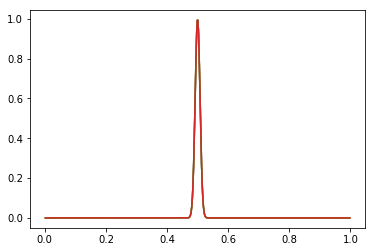

In [565]:
# Building a gaussian 
gauss_array=[]

for i in np.arange(N):
    gauss=np.e**(-0.5*((x_array[i]-0.5)**2)/(16*h**2))
    gauss_array=np.append(gauss_array, gauss)

for n in np.arange(4):
    plt.plot(x_array, gauss_array) # sig=4*h
    
# Good, it works.

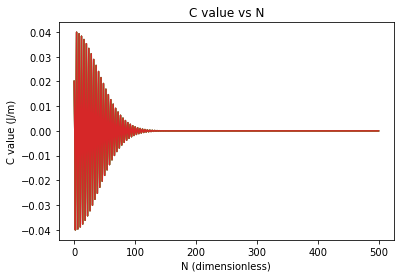

In [567]:
# Build a coefficient vector. These are the contributions from each.

C_array=[]

for i in np.arange(N):
    C=np.dot(gauss_array,eigvectors[:,i])/np.dot(eigvectors[:,i],eigvectors[:,i])
    C_array=np.append(C_array, C)
    
for n in np.arange(4):
    plt.plot(C_array) # sig=4*h
    plt.title("C value vs N")
    plt.xlabel("N (dimensionless)")
    plt.ylabel("C value (J/m)")


# 3 
Alter the coefficient alpha to be a function of position. Try putting a barrier of low diffusivity somewhere( not right at the location of the Gaussian), and see what happens. Try some other pattern you invent too.

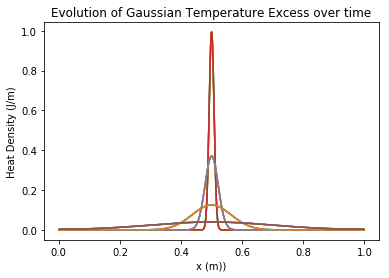

In [568]:
# This array will be a matrix. Each row is for a fixed time. Changing the column changes x.
# Will be NxN.

del_t=0.000001 

def T_elem(i,j):
    T_elem_sum=0 
    for n in np.arange(N):
        T_elem= C_array[n]*eigvectors[i,n]*np.e**((eigvalues[n]/h**2)*del_t*j)
        T_elem_sum=T_elem_sum+T_elem
    return T_elem_sum

# Varying j varies the time 
j=0
T_row=[]
for i in np.arange(N):
    T_row_el=T_elem(i,j)
    T_row=np.append(T_row,T_row_el)

for n in np.arange(4):
    plt.plot(x_array,T_row) # sig=4*h
    plt.title("Evolution of Gaussian Temperature Excess over time")
    plt.xlabel("x (m))")
    plt.ylabel("Heat Density (J/m)")

j=200
T_row=[]
for i in np.arange(N):
    T_row_el=T_elem(i,j)
    T_row=np.append(T_row,T_row_el)

for n in np.arange(4):
    plt.plot(x_array,T_row) # sig=4*h
    
j=2000
T_row=[]
for i in np.arange(N):
    T_row_el=T_elem(i,j)
    T_row=np.append(T_row,T_row_el)

for n in np.arange(4):
    plt.plot(x_array,T_row) # sig=4*h
    
j=20000
T_row=[]
for i in np.arange(N):
    T_row_el=T_elem(i,j)
    T_row=np.append(T_row,T_row_el)

for n in np.arange(4):
    plt.plot(x_array,T_row) # sig=4*h
    

    
# print T_row
# np.e**((eigvalues[n]/h**2)*del_t*j

The plot shows the Gaussian flattening as time progresses. 

3 Alter alpha to be a function of position. Try putting a barrier of low diffusivity somewhere (not right at the location of the Gaussian), and see what happens. Try other patterns. 

In [600]:
N=500

#Spatial step size
h=1/(N+1)

x_array=np.arange(h,(N+1)*h, h) #0....1 in steps of 1/N, 1D array, represents position 

A=[]
A=np.append(A,[-1,1])
A=np.append(A,np.zeros(N-2))

for i in np.arange(2,N): # for 2, 3....N-1: # i is the row number
    A=np.append(A,np.zeros(i-2))
    A=np.append(A,[1,-2,1])
    A=np.append(A,np.zeros(N-(i-2)-3))
A=np.append(A,np.zeros(N-2))
A=np.append(A,[1,-1])
A=np.reshape(A,(N,N))

## Pattern 1: Step function 


In [605]:
# A'=P.A 

# Define alpha to be a function of x
def alph(x):
    if x<0.49:
        alph=1/10
    else:
        alph=1
    return alph

# Build a vector for alpha 
alph_d=[] 
print alph_d
for i in np.arange(N):
    alph_d=np.append(alph_d, alph(x_array[i])) # evaluate alphas along the x axis 

alph_array=np.diag(alph_d) # Create a diagonal matrix. 
print alph_array

A_new=np.matmul(alph_array, A)
print A_new

[]
[[ 0.1  0.   0.  ...,  0.   0.   0. ]
 [ 0.   0.1  0.  ...,  0.   0.   0. ]
 [ 0.   0.   0.1 ...,  0.   0.   0. ]
 ..., 
 [ 0.   0.   0.  ...,  1.   0.   0. ]
 [ 0.   0.   0.  ...,  0.   1.   0. ]
 [ 0.   0.   0.  ...,  0.   0.   1. ]]
[[-0.1  0.1  0.  ...,  0.   0.   0. ]
 [ 0.1 -0.2  0.1 ...,  0.   0.   0. ]
 [ 0.   0.1 -0.2 ...,  0.   0.   0. ]
 ..., 
 [ 0.   0.   0.  ..., -2.   1.   0. ]
 [ 0.   0.   0.  ...,  1.  -2.   1. ]
 [ 0.   0.   0.  ...,  0.   1.  -1. ]]


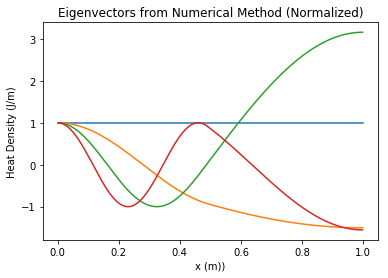

In [602]:
N=500

#Spatial step size
h=1/(N+1)

x_array=np.arange(h,(N+1)*h, h) #0....1 in steps of 1/N, 1D array, represents position 
#print x_array
#print len(x_array)

eigvalues, eigvectors= np.linalg.eig(A_new)
#print eigvalues
#print eigvectors

idx = eigvalues.argsort()[::-1] # Sorts from lowest to highest.
eigvalues = eigvalues[idx]
eigvectors = eigvectors[:,idx]
    
# Normalization

for i in np.arange(N):
    eigvectors[:,i]= eigvectors[:,i]/eigvectors[0,i]
    
idx = eigvalues.argsort()[::-1] # Sorts from lowest to highest.
eigvalues = eigvalues[idx]
eigvectors = eigvectors[:,idx]

for i in np.arange(4):
    plt.plot(x_array, eigvectors[:,i])
    plt.title("Eigenvectors from Numerical Method (Normalized)")
    plt.xlabel("x (m))")
    plt.ylabel("Heat Density (J/m)")


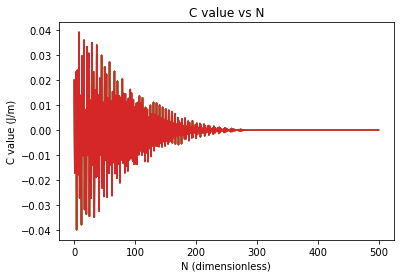

In [603]:
C_array=[]

for i in np.arange(N):
    C=np.dot(gauss_array,eigvectors[:,i])/np.dot(eigvectors[:,i],eigvectors[:,i])
    C_array=np.append(C_array, C)
    
for n in np.arange(4):
    plt.plot(C_array) # sig=4*h
    plt.title("C value vs N")
    plt.xlabel("N (dimensionless)")
    plt.ylabel("C value (J/m)")

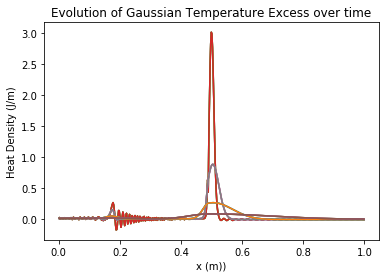

In [604]:
del_t=0.000001 

def T_elem(i,j):
    T_elem_sum=0 
    for n in np.arange(N):
        T_elem= C_array[n]*eigvectors[i,n]*np.e**((eigvalues[n]/h**2)*del_t*j)
        T_elem_sum=T_elem_sum+T_elem
    return T_elem_sum

# Varying j varies the time 
j=0
T_row=[]
for i in np.arange(N):
    T_row_el=T_elem(i,j)
    T_row=np.append(T_row,T_row_el)

for n in np.arange(4):
    plt.plot(x_array,T_row) # sig=4*h
    plt.title("Evolution of Gaussian Temperature Excess over time")
    plt.xlabel("x (m))")
    plt.ylabel("Heat Density (J/m)")

j=200
T_row=[]
for i in np.arange(N):
    T_row_el=T_elem(i,j)
    T_row=np.append(T_row,T_row_el)

for n in np.arange(4):
    plt.plot(x_array,T_row) # sig=4*h
    
j=2000
T_row=[]
for i in np.arange(N):
    T_row_el=T_elem(i,j)
    T_row=np.append(T_row,T_row_el)

for n in np.arange(4):
    plt.plot(x_array,T_row) # sig=4*h
    
j=20000
T_row=[]
for i in np.arange(N):
    T_row_el=T_elem(i,j)
    T_row=np.append(T_row,T_row_el)

for n in np.arange(4):
    plt.plot(x_array,T_row) # sig=4*h

This shows the Gaussian decaying only on the left side; on the right side it is more frozen. 

## Pattern 2: One-sided linear, other side constant

In [610]:
# Define alpha to be a function of x
def alph(x):
    if x<0.49:
        alph=6-10*x
    else:
        alph=1
    return alph

# Build a vector for alpha 
alph_d=[] 
print alph_d
for i in np.arange(N):
    alph_d=np.append(alph_d, alph(x_array[i])) # evaluate alphas along the x axis 

alph_array=np.diag(alph_d) # Create a diagonal matrix. 
print alph_array

A_new=np.matmul(alph_array, A)
print A_new

[]
[[ 5.98003992  0.          0.         ...,  0.          0.          0.        ]
 [ 0.          5.96007984  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          5.94011976 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  1.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          1.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          1.        ]]
[[ -5.98003992   5.98003992   0.         ...,   0.           0.           0.        ]
 [  5.96007984 -11.92015968   5.96007984 ...,   0.           0.           0.        ]
 [  0.           5.94011976 -11.88023952 ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,  -2.           1.           0.        ]
 [  0.           0.           0.         ...,   1.          -2.           1.        ]
 [  0.           0.           0.         ...,   0.           1.         

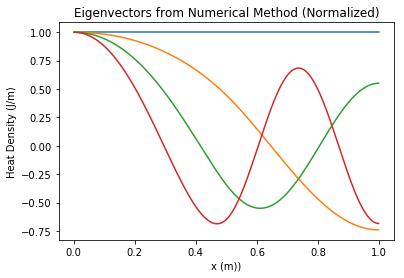

In [611]:
N=500

#Spatial step size
h=1/(N+1)

x_array=np.arange(h,(N+1)*h, h) #0....1 in steps of 1/N, 1D array, represents position 
#print x_array
#print len(x_array)

eigvalues, eigvectors= np.linalg.eig(A_new)
#print eigvalues
#print eigvectors

idx = eigvalues.argsort()[::-1] # Sorts from lowest to highest.
eigvalues = eigvalues[idx]
eigvectors = eigvectors[:,idx]
    
# Normalization

for i in np.arange(N):
    eigvectors[:,i]= eigvectors[:,i]/eigvectors[0,i]
    
idx = eigvalues.argsort()[::-1] # Sorts from lowest to highest.
eigvalues = eigvalues[idx]
eigvectors = eigvectors[:,idx]

for i in np.arange(4):
    plt.plot(x_array, eigvectors[:,i])
    plt.title("Eigenvectors from Numerical Method (Normalized)")
    plt.xlabel("x (m))")
    plt.ylabel("Heat Density (J/m)")


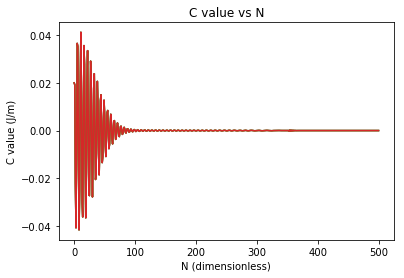

In [612]:
C_array=[]

for i in np.arange(N):
    C=np.dot(gauss_array,eigvectors[:,i])/np.dot(eigvectors[:,i],eigvectors[:,i])
    C_array=np.append(C_array, C)
    
for n in np.arange(4):
    plt.plot(C_array) # sig=4*h
    plt.title("C value vs N")
    plt.xlabel("N (dimensionless)")
    plt.ylabel("C value (J/m)")

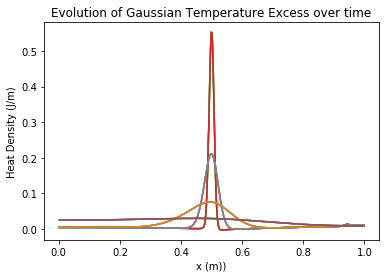

In [613]:
del_t=0.000001 

def T_elem(i,j):
    T_elem_sum=0 
    for n in np.arange(N):
        T_elem= C_array[n]*eigvectors[i,n]*np.e**((eigvalues[n]/h**2)*del_t*j)
        T_elem_sum=T_elem_sum+T_elem
    return T_elem_sum

# Varying j varies the time 
j=0
T_row=[]
for i in np.arange(N):
    T_row_el=T_elem(i,j)
    T_row=np.append(T_row,T_row_el)

for n in np.arange(4):
    plt.plot(x_array,T_row) # sig=4*h
    plt.title("Evolution of Gaussian Temperature Excess over time")
    plt.xlabel("x (m))")
    plt.ylabel("Heat Density (J/m)")

j=200
T_row=[]
for i in np.arange(N):
    T_row_el=T_elem(i,j)
    T_row=np.append(T_row,T_row_el)

for n in np.arange(4):
    plt.plot(x_array,T_row) # sig=4*h
    
j=2000
T_row=[]
for i in np.arange(N):
    T_row_el=T_elem(i,j)
    T_row=np.append(T_row,T_row_el)

for n in np.arange(4):
    plt.plot(x_array,T_row) # sig=4*h
    
j=20000
T_row=[]
for i in np.arange(N):
    T_row_el=T_elem(i,j)
    T_row=np.append(T_row,T_row_el)

for n in np.arange(4):
    plt.plot(x_array,T_row) # sig=4*h

In [ ]:
The difference is not big, but you can see that the Guassian is slightly tilted to the left. 

## Pattern 3: Gaussian dependence 

In [614]:



# A'=P.A 

# Define alpha to be a function of x
def alph(x):
    alph= np.e**(-100*(x-0.5)**2)
    return alph

# Build a vector for alpha 
alph_d=[] 
print alph_d
for i in np.arange(N):
    alph_d=np.append(alph_d, alph(x_array[i])) # evaluate alphas along the x axis 

alph_array=np.diag(alph_d) # Create a diagonal matrix. 
print alph_array

A_new=np.matmul(alph_array, A)
print A_new

[]
[[  1.69492487e-11   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   2.06688781e-11   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   2.51847302e-11 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   2.51847302e-11
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    2.06688781e-11   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.69492487e-11]]
[[ -1.69492487e-11   1.69492487e-11   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.06688781e-11  -4.13377561e-11   2.06688781e-11 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   2.51847302e-11  -5.03694605e-11 ...,   0.00000000e+00
    0.00000000e+00

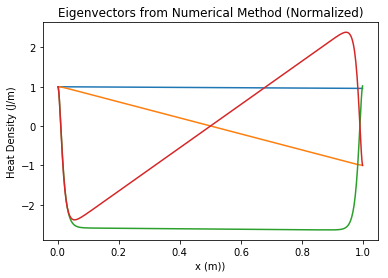

In [615]:
N=500

#Spatial step size
h=1/(N+1)

x_array=np.arange(h,(N+1)*h, h) #0....1 in steps of 1/N, 1D array, represents position 
#print x_array
#print len(x_array)

eigvalues, eigvectors= np.linalg.eig(A_new)
#print eigvalues
#print eigvectors

idx = eigvalues.argsort()[::-1] # Sorts from lowest to highest.
eigvalues = eigvalues[idx]
eigvectors = eigvectors[:,idx]
    
# Normalization

for i in np.arange(N):
    eigvectors[:,i]= eigvectors[:,i]/eigvectors[0,i]
    
idx = eigvalues.argsort()[::-1] # Sorts from lowest to highest.
eigvalues = eigvalues[idx]
eigvectors = eigvectors[:,idx]

for i in np.arange(4):
    plt.plot(x_array, eigvectors[:,i])
    plt.title("Eigenvectors from Numerical Method (Normalized)")
    plt.xlabel("x (m))")
    plt.ylabel("Heat Density (J/m)")


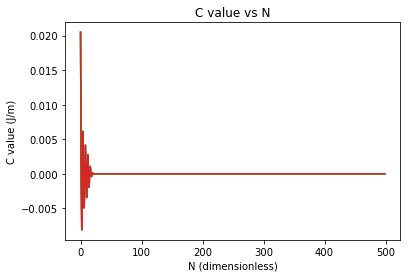

In [616]:
C_array=[]

for i in np.arange(N):
    C=np.dot(gauss_array,eigvectors[:,i])/np.dot(eigvectors[:,i],eigvectors[:,i])
    C_array=np.append(C_array, C)
    
for n in np.arange(4):
    plt.plot(C_array) # sig=4*h
    plt.title("C value vs N")
    plt.xlabel("N (dimensionless)")
    plt.ylabel("C value (J/m)")

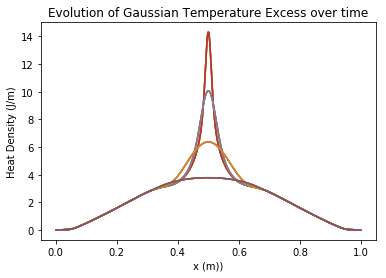

In [617]:
del_t=0.000001 

def T_elem(i,j):
    T_elem_sum=0 
    for n in np.arange(N):
        T_elem= C_array[n]*eigvectors[i,n]*np.e**((eigvalues[n]/h**2)*del_t*j)
        T_elem_sum=T_elem_sum+T_elem
    return T_elem_sum

# Varying j varies the time 
j=0
T_row=[]
for i in np.arange(N):
    T_row_el=T_elem(i,j)
    T_row=np.append(T_row,T_row_el)

for n in np.arange(4):
    plt.plot(x_array,T_row) # sig=4*h
    plt.title("Evolution of Gaussian Temperature Excess over time")
    plt.xlabel("x (m))")
    plt.ylabel("Heat Density (J/m)")

j=200
T_row=[]
for i in np.arange(N):
    T_row_el=T_elem(i,j)
    T_row=np.append(T_row,T_row_el)

for n in np.arange(4):
    plt.plot(x_array,T_row) # sig=4*h
    
j=2000
T_row=[]
for i in np.arange(N):
    T_row_el=T_elem(i,j)
    T_row=np.append(T_row,T_row_el)

for n in np.arange(4):
    plt.plot(x_array,T_row) # sig=4*h
    
j=20000
T_row=[]
for i in np.arange(N):
    T_row_el=T_elem(i,j)
    T_row=np.append(T_row,T_row_el)

for n in np.arange(4):
    plt.plot(x_array,T_row) # sig=4*h

This one is really cool! 